# Comparative Analysis of Image Classification Models on Sight Insight Dataset
In this notebook, we conduct a comparative analysis of different machine learning models for the task of image classification using the Sight Insight Dataset. The dataset comprises images belonging to five distinct classes: Mild, Moderate, NO_DR (No Diabetic Retinopathy), Proliferate_DR, and Severe.

Diabetic Retinopathy (DR) is a common complication of diabetes that affects the eyes, potentially leading to vision loss or blindness if left untreated. Early detection and classification of DR severity play a crucial role in effective patient management and treatment.

Our objective is to explore and compare the performance of three different approaches for image classification:

# Convolutional Neural Network (CNN):
A deep learning model known for its effectiveness in learning hierarchical features directly from images.
# Support Vector Machine (SVM) with Histogram of Oriented Gradients (HOG) features:
A classical machine learning approach that extracts shape and gradient information from images and uses an SVM classifier.
# k-Nearest Neighbors (k-NN) with HOG features:
A simple instance-based learning algorithm that classifies images based on their similarity to other images in the training set.
We start by loading and preprocessing the dataset, followed by feature extraction and model training. We then evaluate the models using standard performance metrics such as accuracy and confusion matrices.
Additionally, we visualize the actual versus predicted labels to gain insights into the models' classification behavior.

By comparing the performance of these models, we aim to identify the most suitable approach for classifying diabetic retinopathy severity from retinal images, ultimately contributing to the development of effective diagnostic tools for healthcare professionals.

# Mount Google Drive for Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1: Convolutional Neural Network (CNN)


# 1.1  Import all necessary libraries

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 1.2   Load data

In [11]:

# Define the directory where your dataset is located
dataset_dir = '/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images'


In [12]:
# Assuming you have five separate directories for each class within the dataset directory
class_names = sorted(os.listdir(dataset_dir))


In [13]:
# Define image dimensions
image_height = 128
image_width = 128
channels = 3  # Assuming RGB images

In [14]:
# Use ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to range [0, 1]
    validation_split=0.2  # Split dataset into training and validation sets
)

In [15]:
# Load and preprocess images from directories
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse',  # For multi-class classification
    subset='training'  # Specify this is for training set
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse',  # For multi-class classification
    subset='validation'  # Specify this is for validation set
)

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


# 1.3 Apply all necessary preprocessing for CNN architecture

In [16]:

# This might include data augmentation, such as rotation, zoom, etc.
# Here's an example of applying rotation and zoom augmentation
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    zoom_range=0.2  # Zoom images by up to 20%
)

train_generator_aug = datagen_aug.flow_from_directory(
    dataset_dir,
    target_size=(image_height, image_width),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

Found 3662 images belonging to 5 classes.


# 1.4 Create a simple but accurate CNN model

In [17]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Number of output classes
])

In [20]:
# Summary Of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0

# 1.5 Train the model

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator_aug, epochs=10, validation_data=val_generator)


Epoch 1/10
115/115 [==============================] - 3337s 29s/step - loss: 1.1879 - accuracy: 0.5284 - val_loss: 1.0787 - val_accuracy: 0.6402
Epoch 2/10
115/115 [==============================] - 41s 355ms/step - loss: 0.9937 - accuracy: 0.6420 - val_loss: 0.9421 - val_accuracy: 0.6443
Epoch 3/10
115/115 [==============================] - 40s 350ms/step - loss: 0.9160 - accuracy: 0.6658 - val_loss: 0.8200 - val_accuracy: 0.6977
Epoch 4/10
115/115 [==============================] - 40s 353ms/step - loss: 0.8928 - accuracy: 0.6775 - val_loss: 0.8465 - val_accuracy: 0.6963
Epoch 5/10
115/115 [==============================] - 40s 350ms/step - loss: 0.8580 - accuracy: 0.6843 - val_loss: 0.8258 - val_accuracy: 0.7004
Epoch 6/10
115/115 [==============================] - 41s 356ms/step - loss: 0.8305 - accuracy: 0.6977 - val_loss: 0.7578 - val_accuracy: 0.7155
Epoch 7/10
115/115 [==============================] - 41s 357ms/step - loss: 0.8137 - accuracy: 0.7054 - val_loss: 0.7978 - val_ac

# 1.6 Evaluate the model

In [ ]:

# Get the validation data for evaluation
X_val, y_val = next(val_generator)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)


1/1 [==============================] - 0s 44ms/step - loss: 0.7594 - accuracy: 0.7188


# 1.7 Plot confusion matrix

1/1 [==============================] - 0s 97ms/step


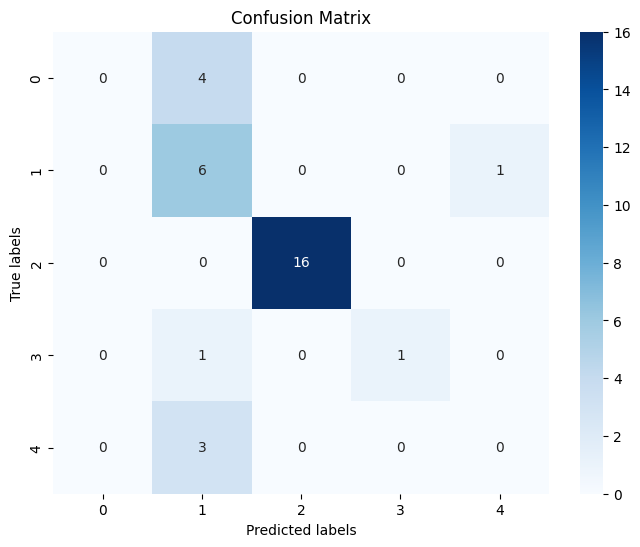

In [ ]:

# Get the predicted labels
y_pred = np.argmax(model.predict(X_val), axis=1)
# Get the true labels
y_true = y_val
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 1.8 Plot training and validation loss and accuracy

In [ ]:

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# 2. Support Vector Machine (SVM) with Histogram of Oriented Gradients (HOG) features

In [ ]:
from skimage.feature import hog
from skimage import io, color, exposure
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 2.1: Load and preprocess images

In [ ]:

import os
# Function For Data Loadidng and Preprocessing
def load_and_preprocess_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = io.imread(path)
        image = color.rgb2gray(image)  # Convert to grayscale
        image = exposure.rescale_intensity(image, in_range=(0, 255))  # Rescale intensity
        images.append(image)
        # Extract label from directory name
        label = os.path.basename(os.path.dirname(path))
        labels.append(label)
    return images, labels


# 2.2 Features Extraction

In [ ]:
# Funtion to  Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        hog_features.append(features)
    return hog_features

In [ ]:
import os

# Define the directory containing your images
directory = '/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images'

# Initialize an empty list to store image paths
image_paths = []

# Iterate through all files and subdirectories in the specified directory
for root, _, files in os.walk(directory):
    for file in files:
        # Check if the file is an image file (you can adjust the condition as needed)
        if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Construct the full path to the image file
            image_path = os.path.join(root, file)
            # Append the image path to the list
            image_paths.append(image_path)

# Print the first few image paths to verify
print("Total images found:", len(image_paths))
print("Sample image paths:")
for i in range(min(5, len(image_paths))):  # Print first 5 paths
    print(image_paths[i])


Total images found: 3662
Sample image paths:
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/bd269a1f0e4d.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/36041171f441.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/89ed6a0dd53f.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/bb11db08584a.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/35d6c4c50072.png


In [ ]:
# Load dataset and extract features
images, labels = load_and_preprocess_images(image_paths)
hog_features = extract_hog_features(images)


# 2.3 Split dataset into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


# 2.4 Train SVM model

In [ ]:

svm_model = SVC(kernel='linear', C=1.0, probability=True)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

# 2.5 Evaluate model

In [ ]:
# Check the Accuracy of Model On test Data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6316507503410641


# 2.6 Compute confusion matrix

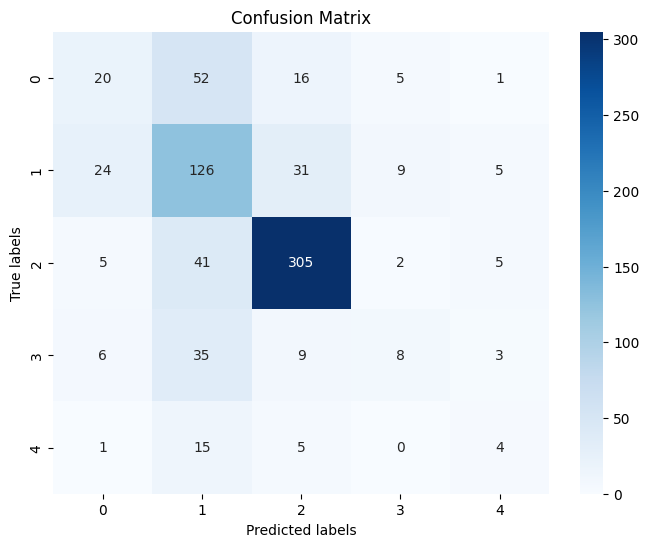

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = svm_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 3. k-Nearest Neighbors (k-NN) with HOG features

In [2]:
from skimage.feature import hog
from skimage import io, color, exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os

# 3.1 Load and preprocess images

In [3]:
# Function to load and Preprocesing Images
def load_and_preprocess_images(image_paths):
    images = []
    labels = []
    for path in image_paths:
        image = io.imread(path)
        image = color.rgb2gray(image)  # Convert to grayscale
        image = exposure.rescale_intensity(image, in_range=(0, 255))  # Rescale intensity
        images.append(image)
        # Extract label from directory name
        label = os.path.basename(os.path.dirname(path))
        labels.append(label)
    return images, labels

# 3.2 Extract HOG features

In [4]:
# Function to Extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")
        hog_features.append(features)
    return hog_features


In [5]:
# Define the directory containing your images
directory = '/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images'

# Initialize an empty list to store image paths
image_paths = []

In [6]:
# Iterate through all files and subdirectories in the specified directory
for root, _, files in os.walk(directory):
    for file in files:
        # Check if the file is an image file (you can adjust the condition as needed)
        if file.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            # Construct the full path to the image file
            image_path = os.path.join(root, file)
            # Append the image path to the list
            image_paths.append(image_path)

# Print the first few image paths to verify
print("Total images found:", len(image_paths))
print("Sample image paths:")
for i in range(min(5, len(image_paths))):  # Print first 5 paths
    print(image_paths[i])


Total images found: 3662
Sample image paths:
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/bd269a1f0e4d.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/36041171f441.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/89ed6a0dd53f.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/bb11db08584a.png
/content/drive/MyDrive/Fiver/sight_insight_dataset/colored_images/Mild/35d6c4c50072.png


In [7]:
# Call the Function to Load dataset and extract features
images, labels = load_and_preprocess_images(image_paths)
hog_features = extract_hog_features(images)


# 3.3 Split dataset into training and testing sets

In [8]:

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)


# 3.4 Train k-NN model

In [9]:

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# 3.5 Evaluate model

In [10]:
# Evaluate model Accuracy  on Test Dataset
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5375170532060027


# 3.6 Plot actual labels against predicted labels

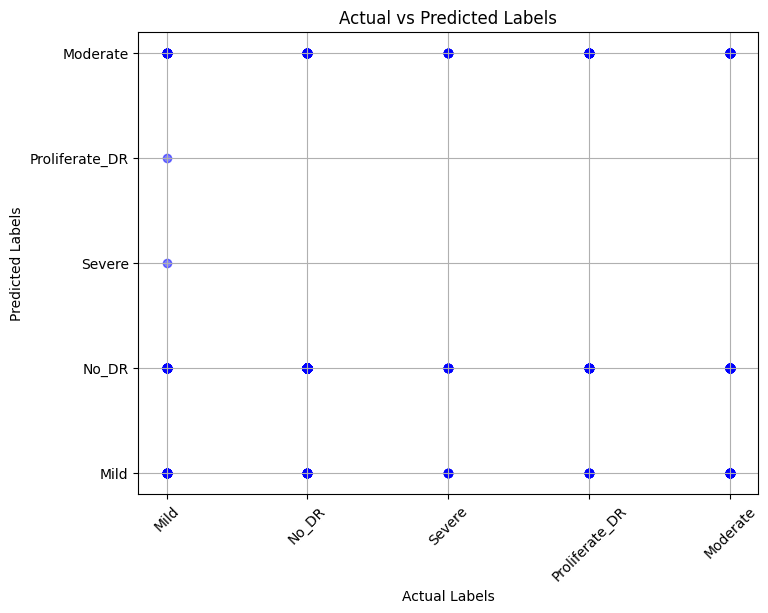

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Convert labels to numeric values for plotting
label_mapping = {label: i for i, label in enumerate(set(labels))}
y_test_numeric = np.array([label_mapping[label] for label in y_test])
y_pred_numeric = np.array([label_mapping[label] for label in y_pred])

# Plot actual labels against predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numeric, y_pred_numeric, c='blue', alpha=0.5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs Predicted Labels')
plt.xticks(ticks=np.arange(len(label_mapping)), labels=label_mapping.keys(), rotation=45)
plt.yticks(ticks=np.arange(len(label_mapping)), labels=label_mapping.keys())
plt.grid(True)
plt.show()
